**Task1:Find if there is a correlation between the price of the apps and the Content Rating (Teen, Everyone, Mature).**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/googleplaystore_clean.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   int64  
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   float64
 8   Content_Rating  9660 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 679.3+ KB


<Axes: xlabel='Content_Rating'>

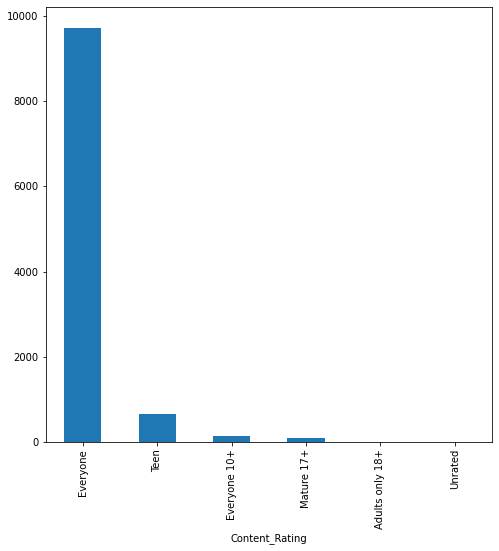

In [5]:
#df.plot.bar(x='Content_Rating', y='Price')
df.groupby('Content_Rating')['Price'].sum().sort_values(ascending=False).plot.bar(figsize=(8,8))

In [12]:
#sklearn mostly used for data science
#preprocessing is used for data cleaning and transforming
#labelencoder is used to transform categorical values into numerical 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df['Content_Rating'].unique())

df['Content_Rating_new'] = le.transform( df['Content_Rating']  )  

In [10]:
df['Content_Rating_new'].corr(df['Price'])

-0.01448479947419362

<Axes: >

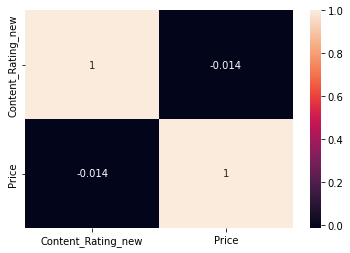

In [11]:
import seaborn as sns
corr = df[['Content_Rating_new','Price']].corr()
sns.heatmap(corr, annot=True)